In [ ]:
!pip install autograd

     |████████████████████████████████| 829 kB 16.6 MB/s 
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=e0ae93e0d23f6c1a974db4e6400fa9c47075dfeae8b5bf197a4096d0adc5a928
  Stored in directory: /home/jovyan/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=b98f826a8cb7b48302acebf9050847ed072734b182654e67fba7209cf23a7ca2
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built autograd future
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from baselines import *
from uncertainty import *

from autograd import numpy as np
from autograd import grad, elementwise_grad
from autograd.misc.optimizers import adam, sgd
from sklearn.datasets import make_moons
import numpy.random as npr
import pandas as pd
import numpy 
import scipy as sp
import matplotlib.pyplot as plt
import sys
%matplotlib inline


In [ ]:

# Generate a toy dataset for classification
samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_train = np.vstack((class_0, class_1))
y_train = np.array([0] * 100 + [1] * 100)

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

###neural network model design choices
width = 4
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 0.47571533424916773; gradient mag: 0.1622208068029572
Iteration 100 lower bound 0.3536177191069914; gradient mag: 0.5627974964202879
Iteration 200 lower bound 0.09773926925507986; gradient mag: 0.265769272162846
Iteration 300 lower bound 0.050691642791709686; gradient mag: 0.10821983466982273
Iteration 400 lower bound 0.039804354311437494; gradient mag: 0.057922458583920054
Iteration 500 lower bound 0.035499278633446006; gradient mag: 0.03657267164896046
Iteration 600 lower bound 0.033112443437191004; gradient mag: 0.02684654457749873
Iteration 700 lower bound 0.03135969308421955; gradient mag: 0.020130080586180925
Iteration 800 lower bound 0.030070462744417773; gradient mag: 0.016091814798668246
Iteration 900 lower bound 0.0291254003481806; gradient mag: 0.013773669917633357
Iteration 1000 lower bound 0.028334943477595152; gradient mag: 0.012253209944114265
Iteration 1100 lower bound 0.027637209637990552; gradient mag: 0.011012604194844797
Iteration 1200 lower 

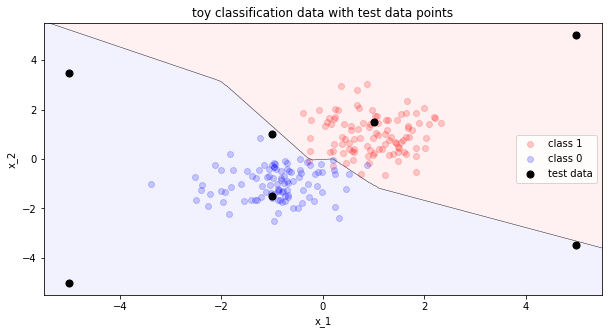

In [ ]:
# defining test points
test_points = [(-5, -5), (-5, 3.5), (5, 5), (5, -3.5), (-1, 1), (-1, -1.5), (1, 1.5)]

# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, [nn], ax, poly_degree=1, test_points=test_points, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20
nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)

Iteration 2300 lower bound 0.01606631988678885; gradient mag: 0.0035898157435216215
Iteration 2400 lower bound 0.01569543644898247; gradient mag: 0.007544292947305767
Iteration 2500 lower bound 0.015339709620718883; gradient mag: 0.0036381098714213336
Iteration 2600 lower bound 0.015000626375696954; gradient mag: 0.007690457240204129
Iteration 2700 lower bound 0.014679599332303126; gradient mag: 0.0034927966213099113
Iteration 2800 lower bound 0.014378225282473105; gradient mag: 0.0035920566813319376
Iteration 2900 lower bound 0.014096392738241259; gradient mag: 0.007342749619973792
Iteration 3000 lower bound 0.013834816331516763; gradient mag: 0.0031510606426390577
Iteration 3100 lower bound 0.013593781474657216; gradient mag: 0.006706560710224822
Iteration 3200 lower bound 0.01337318326145211; gradient mag: 0.0030340969356163505
Iteration 3300 lower bound 0.013171890987448472; gradient mag: 0.0029898460654751062
Iteration 3400 lower bound 0.012989641919033294; gradient mag: 0.0028787

/home/jovyan/work/am207/baselines.py:492: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


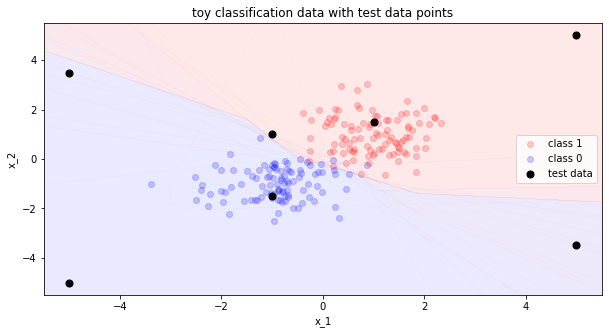

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, nn_all, ax, poly_degree=1, test_points=test_points, shaded=True)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [ ]:
#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 6
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 0.2066635723195796; gradient mag: 0.32817008246221957
Iteration 100 lower bound 0.2355720792496948; gradient mag: 0.1710824597811692
Iteration 200 lower bound 0.12501010020335557; gradient mag: 0.10481261849765311
Iteration 300 lower bound 0.13148265951985225; gradient mag: 0.10608031827693312
Iteration 400 lower bound 0.13142502938655598; gradient mag: 0.07478394516811643
Iteration 500 lower bound 0.05797044844115763; gradient mag: 0.1769338885547478
Iteration 600 lower bound 0.034063524479627676; gradient mag: 0.18984607756926394
Iteration 700 lower bound 0.03551404474279634; gradient mag: 0.6178950681323665
Iteration 800 lower bound 0.02998960485469786; gradient mag: 0.177102978184167
Iteration 900 lower bound 0.024810484593078462; gradient mag: 0.049549008965211035
Iteration 1000 lower bound 0.1464653350666038; gradient mag: 0.02528664640087266
Iteration 1100 lower bound 0.02502150343616738; gradient mag: 0.01030935820874135
Iteration 1200 lower bound 0.0687

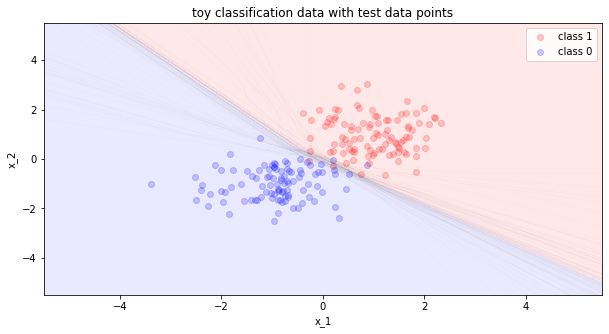

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_decision_boundary(x_train, y_train, [nn_dropout]*100, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

xx (14400, 2)


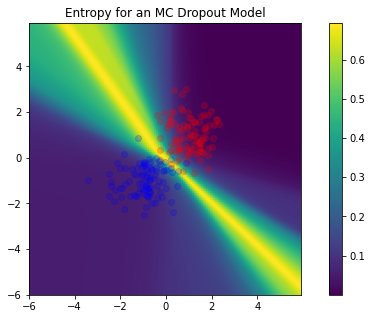

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_dropout, [nn_dropout.weights]*50, ax, 'Entropy for an MC Dropout Model', poly_degree=1, test_points=test_points, shaded=True)# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()


In [ ]:
S = 20
max_iteration = 15000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)


Optimizing variational parameters...
Iteration 0 lower bound -1398.873653469718; gradient mag: 1561.8937856554853
Iteration 100 lower bound -854.4038735086305; gradient mag: 1105.6852993414327
Iteration 200 lower bound -591.9394920446174; gradient mag: 508.46082136821445
Iteration 300 lower bound -504.76299856372424; gradient mag: 256.3458817687376
Iteration 400 lower bound -464.00191166240404; gradient mag: 163.7260677905047
Iteration 500 lower bound -439.1873234423791; gradient mag: 116.44475393947319
Iteration 600 lower bound -422.11423241489376; gradient mag: 87.92644176688952
Iteration 700 lower bound -409.94290887165084; gradient mag: 65.25315281277305
Iteration 800 lower bound -400.85932114386867; gradient mag: 50.55772375285913
Iteration 900 lower bound -393.2874938241798; gradient mag: 42.00386029049499
Iteration 1000 lower bound -386.7011680196381; gradient mag: 34.24446191014304
Iteration 1100 lower bound -380.81484611563695; gradient mag: 29.142990219245146
Iteration 1200 l

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2


samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)

posterior_sample_size = 200
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T) # CHECK: Why are we doing the forward through the DROPOUT model?
y_predict_noiseless = np.squeeze(y_predict_noiseless)

NameError: name 'variational_params' is not defined

In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
for i in range(posterior_sample_size):
    plot_decision_boundary(x_test, y_predict_noiseless[i,:], [nn_dropout], ax, poly_degree=1, test_points=None, shaded=False)

In [ ]:
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20

class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)

retain_perc = np.linspace(0.2, 1, 10)
auc = np.zeros([len(retain_perc),N])
auc_det = np.zeros([len(retain_perc),N])
for (i, perc) in enumerate(retain_perc):
    for j in range(N):
        auc[i,j] = auc_calc(x_test, y_test, nn_dropout, N, perc)

    # use sigmoid probability for retaining data
    auc_det[i,:] = auc_calc_proba(x_test, y_test, nn, N, perc)

auc_ub = np.percentile(auc, 97.5, axis=1)
auc_lb = np.percentile(auc, 2.5, axis=1)

auc_ub_det = np.percentile(auc_det, 97.5, axis=1)
auc_lb_det = np.percentile(auc_det, 2.5, axis=1)

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.fill_between(retain_perc, auc_ub, auc_lb, color='blue', alpha=0.2)
ax.plot(retain_perc, np.mean(auc,axis=1), 'blue', label='MC dropout')
# ax.fill_between(retain_perc, auc_ub_det, auc_lb_det, color='green', alpha=0.2)
# ax.plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
ax.legend()
plt.show()


In [ ]:
# calculate the accuracy for MC dropout
def auc_calc(x_test, y_test, nn, N, perc): 
    p = []
    n_test = len(y_test)
    p_mean, entropymean = myentropy(nn, [nn.weights]*N, x_test.T)
    idx = np.argsort(entropymean)
    y_test = y_test[idx]
    p_mean = p_mean[idx]
    y_pred_retained = p_mean[0:int(perc*n_test)] # choosing samples with smallest entropy to evaluate 
    y_test_retained = y_test[0:int(perc*n_test)]
    predict_proba = np.round(y_pred_retained)

    auc = len(y_test_retained[predict_proba==y_test_retained]) / len(y_pred_retained) * 100
    return auc

# calculate the accuracy for deterministic model
def auc_calc_proba(x_test, y_test, nn, N, perc):
    n_samples = len(y_test)
    auc = np.zeros(N)
    for j in range(N):
        p_here = nn.forward(nn.weights, x_test.T)[0][0]
        idx = np.argsort(p_here)
        i2 = int((1-perc/2)*n_samples)
        i1 = int(perc*n_samples/2)
        idx1 = idx[0:i1] # indices predicted to be 0 
        idx2 = idx[i2:] # indices predicted to be 1 
        x0 = x_test[idx1]
        y0 = y_test[idx1]
        y1 = y_test[idx2]
        # print(len(y1[y1==1])+len(y0[y0==0]), len(y0)+len(y1), (len(y1[y1==1])+len(y0[y0==0]))/(n_samples*perc))
        auc[j] = (len(y0[y0==0]) + len(y1[y1==1]))/(len(y0) + len(y1)) * 100
    return auc

In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.2, c='blue', label='class 0')

In [ ]:
#NM-Looking at AUC on the x_train data
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20
'''
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)
'''
retain_perc = np.linspace(0.2, 1, 10)
auc = np.zeros([len(retain_perc),N])
auc_det = np.zeros([len(retain_perc),N])
for (i, perc) in enumerate(retain_perc):
    for j in range(1):
        auc[i,j] = auc_calc(x_train, y_train, nn_dropout, 100*2, N, perc)

    # use sigmoid probability for retaining data
    auc_det[i,:] = auc_calc_proba(x_train, y_train, nn, 100*2, N, perc)

auc_ub = np.percentile(auc, 97.5, axis=1)
auc_lb = np.percentile(auc, 2.5, axis=1)

auc_ub_det = np.percentile(auc_det, 97.5, axis=1)
auc_lb_det = np.percentile(auc_det, 2.5, axis=1)

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.fill_between(retain_perc, auc_ub, auc_lb, color='blue', alpha=0.2)
ax.plot(retain_perc, np.mean(auc,axis=1), 'blue', label='MC dropout')
ax.fill_between(retain_perc, auc_ub_det, auc_lb_det, color='green', alpha=0.2)
#ax.plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
ax.legend()
plt.show()
